# 17. Bag of Words

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

from konlpy.tag import Okt

import random
import codecs
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 17.1 Prepare Data

In [3]:
f = codecs.open("data/reviews.txt", 'r', 'utf-8')
f.read()[:500]

'# G마켓에 좋은 평만 있어서 사봤는데.. 정말 진짜 진짜 사지마세요. 개. 쓰. 레. 기 (진심) 입니다. 액정부터 짜증나는 TN패널에, 하드 SSD인걸로 알았는데, 속도는 저질 SD카드 꽂아 놓은것 같습니다. 정말 느려터집니다. 저는 단지 인터넷 뱅킹만 할려고, 샀단 말입니다. 그런데 인터넷 뱅킹 프로그램까는데만 10~20분 걸립니다. 뭐약!! 이게!! 분노로 인해 볼때마다 짜증납니다. 밤에 잠도 안오고요.. 사시면 분명 후회하실겁니다. 아! 진짜 G마켓 프리미엄평으로 실날하게 사진찍어서 올리려고했는데, 먹고 산다고 바빠서 프리미엄 평 못 올린게 정말 천추의 한이네요!!\n# 원래 그런 줄 알고 사는 "저가 제품"이라고 생각합니다만. IPS라는 언급이 없으니 당연히 TN 패널일 테고, EMMC는 SSD가 아니고 SD 카드 내장된 것 같은 것이라 원래 SSD보다 느린 것이고, CPU도 아톰이니 뭐 당연히 느리죠. 그런 것 다 감안하고 "싸고 가볍다"는 조건으로 사는 제품인데요. 뭐 '

## 17.2 Extract Setences

In [4]:
keywords = ["발열", "소음"]

for keyword in keywords :
    temp_list = []
    save_name = "data/reviews_" + keyword + ".txt"
    f = codecs.open("data/reviews.txt", 'r', 'utf-8')
    t = codecs.open(save_name, 'w', 'utf-8')
    
    while True:
        line = f.readline()
        if not line: break
        if keyword in line :
            temp_list.append(line)
            
    set_list = list(set(temp_list))
    
    for item in set_list :
        t.write(item)
        
    f.close()
    t.close()

In [5]:
f = codecs.open("data/reviews_발열.txt", 'r', 'utf-8')
f.read()[:500]

'# 화면이 작을까봐 14인치랑 굉장히 고민 많이했는데... 제 선택이 맞았네요.저는 매일 가지고 다녀야 해서 휴대성을 가장 크게 보고 골랐는데요.화면도 고민했던 것 처럼 작지 않고 좋습니다!!무게는 말할 것도 없이 정말 가볍고 얇아요~!! 디자인, 휴대성... 뭐 하나 빠지는 게 없네요. 윈도우도 깔려 있어서 더 좋습니다^^ 발열도 심하지 않고, 자판도 편해요.다만 숫자키가 옆에 없어서 아쉽지만, 작은 사이즈는 어쩔 수 없으니까요~암튼 완전 만족입니당~^^\n# 여기 이삼성노트북 첫번째는 동생한테가게되서, 삼성노트북 두번째 구입하게 되었고, 현재저렴하면서 작은거 웬만큼 쓸만한거 삼성 엘지(텝북은너무비싸구)제품 중에는 이삼성노트북밖에없습니다더욱이 브라스웰제품 중에는 유일하죠 (4GB128GB) , 자정리하자면 화면 야외서보는데지장없고, 인터넷동영상하는데 지장없고사운드좋구요, 소음이없고 오랜시간써도 발열이거의없기에 도서관 자료검색 인강용으로 가성비최고가 아닐까 하는 생각이 듭니다.물론 돈'

## 17.3 Load Scored Data

In [6]:
filename = "data/score_발열.xlsx"
sheet_name = "Sheet1"
data = pd.read_excel(filename, sheet_name = sheet_name, header = 0)

csv_data = [item.replace("#", "").strip() for item in data['Review']]
csv_label = data['Score']

In [7]:
csv_data[:5]

['발열히 심한거 같은데 여름이라 그런가?..',
 '발열이좀 심한거 같아서 걱정이에요',
 '발열이심하더라구요',
 '발열이너무심한게 제일큰 단점인것 같고 그외에 불편한점은',
 '발열이...정말...심합니다']

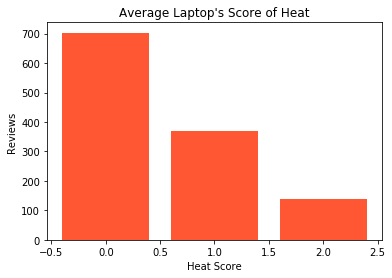

In [8]:
scores = [sum(csv_label == 0), sum(csv_label == 1), sum(csv_label == 2)]
plt.bar(range(len(scores)),scores, color="#ff5733")

plt.title("Average Laptop's Score of Heat")
plt.xlabel("Heat Score")
plt.ylabel("Reviews")

plt.show()

## 17.4 Bag of Words

In [9]:
tokenizer = Okt()
doc = []

for sentence in csv_data :
    results= []
    tokens = tokenizer.pos(sentence, norm=True, stem=True)
        
    for token in tokens:
        if not token[1] in ["Josa", "Eomi", "Punctuation"]:
            results.append(token[0])
    doc.append(" ".join(results).strip())

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [10]:
doc[:5]

['발열 히 심하다 같다 여름 그 런가',
 '발열 이 좀 심하다 같다 걱정',
 '발열 심하다',
 '발열 이 너 무심하다 제일 크다 단점 것 같다 그 외 불편하다 점',
 '발열 정말 심하다']

In [11]:
# CountVectorizer
cnv = CountVectorizer(ngram_range=(1,1), min_df = 3)

data = cnv.fit_transform(doc).toarray()
label = csv_label.values

In [12]:
# TF-IDF Vectorizer
# tfidv = TfidfVectorizer().fit(data)
# data = tfidv.transform(data).toarray()

# data = pd.DataFrame(data)
# data = (data - data.mean()) / (data.max() - data.min() + 1)

In [13]:
cnv.vocabulary_

{'발열': 112,
 '심하다': 156,
 '같다': 13,
 '여름': 187,
 '걱정': 16,
 '무심하다': 104,
 '크다': 266,
 '단점': 57,
 '불편하다': 125,
 '정말': 237,
 '확실하다': 292,
 '심해': 157,
 '노트북': 45,
 '쿨러': 263,
 '사용': 134,
 '크게': 265,
 '진짜': 250,
 '너무': 43,
 '많이': 93,
 '있다': 218,
 '장시간': 228,
 '높다': 47,
 '프로그램': 275,
 '한편': 283,
 '이다': 204,
 '심다': 155,
 '밧데리': 113,
 'cpu': 4,
 '용량': 200,
 '빼다': 131,
 '괜찮다': 22,
 '느낌': 50,
 '하지만': 281,
 '자판': 221,
 '조금': 241,
 '속도': 149,
 '매우': 94,
 '좋다': 244,
 '이전': 211,
 '하다': 279,
 '뜨겁다': 83,
 '가볍다': 10,
 '조용하다': 242,
 '마음': 88,
 '듭니': 72,
 '돌아가다': 65,
 '불량': 124,
 '심해지다': 158,
 '생기다': 141,
 '소리': 147,
 '나다': 38,
 '그렇다': 31,
 '부분': 122,
 '문제': 107,
 '끊기다': 37,
 '쓰다': 160,
 '약간': 175,
 '게임': 18,
 '돌리다': 64,
 '정도': 236,
 '성능': 145,
 '라면': 85,
 '지다': 249,
 '이렇다': 206,
 '부팅': 123,
 '화상': 289,
 '원래': 202,
 '모르다': 100,
 '않다': 171,
 '구매': 24,
 '신분': 154,
 '야하다': 174,
 '제외': 239,
 '자주': 220,
 '발생': 111,
 '삼성': 137,
 '소음': 148,
 '치다': 259,
 '만족하다': 91,
 '배터리': 116,
 '빠르다': 128,
 '무엇': 105,
 '생각': 

## 17.5 Train-Test Split

In [14]:
dim = len(cnv.vocabulary_)

In [15]:
train_data, test_data, train_label, test_label = train_test_split(data, label, stratify = label)

print(len(train_data))
print(len(test_data))

908
303


In [16]:
x = torch.from_numpy(train_data).type(torch.FloatTensor)
y = torch.from_numpy(train_label).type(torch.LongTensor)

In [17]:
y.size() , x.size()

(torch.Size([908]), torch.Size([908, 295]))

In [18]:
train_data = TensorDataset(x, y)

batch_size = 10

train_loader  = DataLoader(dataset=train_data,
                           batch_size=batch_size,
                           shuffle=True,
                           num_workers=1,
                           drop_last = True)

## 17.6 Define and Train Model

In [19]:
linear1 = nn.Linear(dim, 200, bias = True)
linear2 = nn.Linear(200, 3, bias = True)
relu = nn.ReLU()

model = nn.Sequential(linear1, relu, linear2)

In [20]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [21]:
num_epochs = 50

In [22]:
for epoch in range(num_epochs):
    
    total_batch = len(train_data) // batch_size
    
    for i, (batch_text, batch_labels) in enumerate(train_loader):
        
        X = batch_text.view(-1, dim)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 20 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/50], lter [20/90], Loss: 0.9148
Epoch [1/50], lter [40/90], Loss: 0.8863
Epoch [1/50], lter [60/90], Loss: 0.6495
Epoch [1/50], lter [80/90], Loss: 0.7840
Epoch [2/50], lter [20/90], Loss: 0.4797
Epoch [2/50], lter [40/90], Loss: 0.6357
Epoch [2/50], lter [60/90], Loss: 0.6474
Epoch [2/50], lter [80/90], Loss: 1.0916
Epoch [3/50], lter [20/90], Loss: 0.9933
Epoch [3/50], lter [40/90], Loss: 0.7154
Epoch [3/50], lter [60/90], Loss: 0.3200
Epoch [3/50], lter [80/90], Loss: 0.4253
Epoch [4/50], lter [20/90], Loss: 0.0941
Epoch [4/50], lter [40/90], Loss: 0.2851
Epoch [4/50], lter [60/90], Loss: 0.1472
Epoch [4/50], lter [80/90], Loss: 0.3241
Epoch [5/50], lter [20/90], Loss: 0.2410
Epoch [5/50], lter [40/90], Loss: 0.2816
Epoch [5/50], lter [60/90], Loss: 0.8152
Epoch [5/50], lter [80/90], Loss: 0.3003
Epoch [6/50], lter [20/90], Loss: 0.0499
Epoch [6/50], lter [40/90], Loss: 0.2037
Epoch [6/50], lter [60/90], Loss: 0.0628
Epoch [6/50], lter [80/90], Loss: 0.3265
Epoch [7/50], lt

Epoch [50/50], lter [20/90], Loss: 0.0042
Epoch [50/50], lter [40/90], Loss: 0.1019
Epoch [50/50], lter [60/90], Loss: 0.0025
Epoch [50/50], lter [80/90], Loss: 0.0009
Learning Finished!


## 17.7 Test Model

In [23]:
x_test = torch.from_numpy(test_data).type(torch.FloatTensor)
y_test = torch.from_numpy(test_label).type(torch.LongTensor)

test_data = TensorDataset(x_test, y_test)

test_loader  = DataLoader(dataset=test_data,
                          batch_size=1,
                          shuffle=True)

In [24]:
model.eval()

correct = 0
total = 0

for text, labels in test_loader:
    
    text = text.view(-1, dim)
    outputs = model(text)
    
    _, pre = torch.max(outputs.data, 1)
    total += 1
    correct += (pre == labels).sum()
    
print('Accuracy of test text: %f %%' % (100 * float(correct) / total))

Accuracy of test text: 78.547855 %


## 17.8 Test Sentence

In [25]:
def IsitHot(string) :
    
    results= []
    tokens = tokenizer.pos(string, norm=True, stem=True)

    for token in tokens:
        if not token[1] in ["Josa", "Eomi", "Punctuation"]:
            results.append(token[0])
   
    sample = cnv.transform([" ".join(results).strip()]).toarray()
    sample = torch.from_numpy(sample).type(torch.FloatTensor)
    outputs = model(sample)
    pre = torch.max(outputs.data, 1)[1].numpy()
    
    if pre == 0 : 
        print("분석 결과 : 발열 거의 없음")
    elif pre == 1 :
        print("분석 결과 : 발열 조금 있음")
    else :
        print("분석 결과 : 발열 매우 심함")

In [26]:
IsitHot("노트북이 너무 뜨거워요")

분석 결과 : 발열 매우 심함


In [27]:
IsitHot("발열을 잘 잡았네요")

분석 결과 : 발열 거의 없음
